In [46]:
import robustocs as rocs # Robust optimal contribution selection (unertainty in optimal contribution selectio)
from robustocs import utils
from robustocs import pedigree
import math

import numpy as np # used for numerical computing
import pandas as pd # used for data manipulation and analysis

import sklearn # used libraries for machine learning in Python
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import matplotlib.pyplot as plt # plotting library
import seaborn as sns


In [2]:
import os # a way to interact with the operating system
cwd = os.getcwd()
cwd

'/Users/s2745345/Documents/jortiz_phd/robust/robust_lambda/robustOCS'

# Lambda

From portfolio selection theory (Markowitz, 1952), standard optimal contribution selection can be expressed as a quadractic programming problem. As a breeders we have a set of N animals (candidates) and want to choose a "portfolio", with x(i) being the contributions of each candidate "i". Given a cohort of n selection candidates, stored in a n-dimesional vector "a" which describes the estimation of the genetic value of individuals as parents of the next generation. In addition, we obtain a gentic relationshio matrix "A", with coefficient sigmaij between candidates i and j, which describes genetic similarity between candidates. For a given level of  risk-aversion lambda we maximize the risk-adjusted expected return:

$max(x^Ta - lambdax^TAx)$

In [ ]:
print(1/(2*50)) # Rate of inbreeding when Ne = 50
print(1/(2*100)) # Rate of inbreeding when Ne = 100


0.01
0.005


In [3]:
# load in the problem variables
sigma, mubar, omega, n, sires, dams, names = rocs.load_problem(
    sigma_filename="50/A50.txt",
    mu_filename="50/EBV50.txt",
    omega_filename="50/S50.txt",
    sex_filename="50/SEX50.txt",
    issparse=True
)

In [4]:
sires = range(0, n, 2)
dams = range(1, n, 2)

# print(sigma[0:3,0:3]) # yes, this is numerator relationship matrix

#lam = 0.5
#w, obj = rocs.highs_standard_genetics(
#    sigma, mubar, sex, lam, dimension=50)

In [110]:
# Define upper bound contributions
n = 50  

# Initialize the array with zeros
upper = np.zeros(n)

# Set values for even indices (0, 2, 4, ...) → 0.5
upper[::2] = 0.5  

# Set values for odd indices (1, 3, 5, ...) → 0.01
upper[1::2] = 0.02 

print(upper)
print(type(upper))

[0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02
 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02
 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02
 0.5  0.02 0.5  0.02 0.5  0.02 0.5  0.02]
<class 'numpy.ndarray'>


In [111]:
# Define lower bound contributions
n = 50  

# Initialize the array with zeros
lower = np.zeros(n)

# Set values for even indices (0, 2, 4, ...) → 0.5
lower[::2] = 0.0  

# Set values for odd indices (1, 3, 5, ...) → 0.01
lower[1::2] = 0.02  

print(lower)

[0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02
 0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02
 0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02 0.   0.02
 0.   0.02 0.   0.02 0.   0.02 0.   0.02]


In [112]:
# Methods to compute current coancetry among selected candidates
# Compute C as A divided by 2
kin = sigma / 2

# n
n = kin.shape[0]

# Compute 1^T C 1 (sum of all elements in kin)
result = np.sum(kin)

# Compute mean_1 correctly (fixing exponentiation issue)
n = kin.shape[0]  # Matrix size (assuming square matrix)
mean_1 = result / (n ** 2)  # Corrected exponentiation

# Compute mean_2 using NumPy mean function
mean_2 = kin.mean()

# Compute mean_3 weighted x same contributions, by using robustOCS
x = np.ones(n) / n
mean_3 = utils.group_coancestry(x, kin)

# Print results
print("1^T C 1:", result)
print("mean_1:", mean_1)
print("mean_2:", mean_2)
print("mean_3:", mean_3)


1^T C 1: 109.2901802062988
mean_1: 0.04371607208251952
mean_2: 0.04371607208251952
mean_3: 0.043716072082519535


In [113]:
# Target coancestry

# Write a page where I explain all the work we did here today one and one meeting.

# Talk to Josh if we cn provide deltaC instead of lambda, I try to do the cahnges in the code


Ne = 50

targetCoancestry50 = (1/(2*50))*(1 - mean_1) + mean_1

targetCoancestry100 = (1/(2*100))*(1 - mean_1) + mean_1

print("targetCoancetry Ne = 50", targetCoancestry50)
print("targetCoancetry Ne = 100", targetCoancestry100)

targetCoancetry Ne = 50 0.053278911361694326
targetCoancetry Ne = 100 0.04849749172210692


In [114]:

empirical_evaluation = [float(x) for x in (0, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 6, 7, 8, 9, 10, 
                                           11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22.5, 25, 35, 
                                           40, 45, 50)]
results = []

n = kin.shape[0]
#print(n)
w = np.ones(n) / n


#print(sum(w))
print(w)

genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
#print(group_coancestry_current)

# Run the function for each lambda value
for lam in empirical_evaluation:
    # Get the result from the previous function call
    w, obj = rocs.highs_standard_genetics(kin, mubar, sires, dams, lam, dimension=n)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results
    results.append((lam, obj, genetic_merit_sel, group_coancestry_sel, deltaC, Ne))

# Convert results to a pandas DataFrame for a table-like structure
df_original = pd.DataFrame(results, columns=['lambda', 'objective', 'geneticMeritSel', 'groupCoancestrySel', 'deltaC', 'Ne'])

# Optionally, print the table
#filtered_df = df_original[(df_original["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]
print(df_original)


[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
    lambda  objective  geneticMeritSel  groupCoancestrySel    deltaC  \
0    0.000   2.159149         2.159149            0.275099  0.241960   
1    0.005   2.158461         2.159149            0.275099  0.241960   
2    0.010   2.157773         2.159149            0.275099  0.241960   
3    0.050   2.152273         2.159073            0.272026  0.238747   
4    0.100   2.146106         2.157194            0.221753  0.186176   
5    0.500   2.113857         2.148405            0.138191  0.098794   
6    1.000   2.084431         2.137116            0.105370  0.064472   
7    5.000   1.914511         2.099328            0.073927  0.031592   
8    6.000   1.878217         2.092130            0.071304  0.028849   
9    7.000   1.843145    

In [116]:
# Scaling values
df_original['geneticMeritScaledMax'] = df_original['geneticMeritSel'] / df_original['geneticMeritSel'].max()
df_original['groupCoancestryScaledMin'] = df_original['groupCoancestrySel'] / df_original['groupCoancestrySel'].min()

#df.to_csv('empirical_robustOCS.txt', index=False, sep='\t')

print(df_original)

    lambda  objective  geneticMeritSel  groupCoancestrySel    deltaC  \
0    0.000   2.159149         2.159149            0.275099  0.241960   
1    0.005   2.158461         2.159149            0.275099  0.241960   
2    0.010   2.157773         2.159149            0.275099  0.241960   
3    0.050   2.152273         2.159073            0.272026  0.238747   
4    0.100   2.146106         2.157194            0.221753  0.186176   
5    0.500   2.113857         2.148405            0.138191  0.098794   
6    1.000   2.084431         2.137116            0.105370  0.064472   
7    5.000   1.914511         2.099328            0.073927  0.031592   
8    6.000   1.878217         2.092130            0.071304  0.028849   
9    7.000   1.843145         2.083881            0.068782  0.026212   
10   8.000   1.809550         2.071836            0.065572  0.022855   
11   9.000   1.777492         2.059629            0.062697  0.019849   
12  10.000   1.746798         2.047753            0.060191  0.01

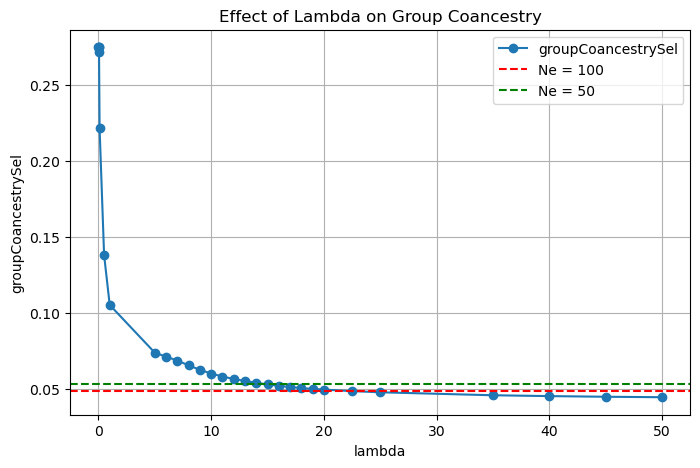

In [117]:
# Plot Effect Lambda on Group Coancestry

plt.figure(figsize=(8, 5))
plt.plot(df_original['lambda'], df_original['groupCoancestrySel'], marker='o', linestyle='-', label='groupCoancestrySel')
plt.axhline(y=targetCoancestry100, color='r', linestyle='--', label='Ne = 100')
plt.axhline(y=targetCoancestry50, color='g', linestyle='--', label='Ne = 50')
plt.xlabel('lambda')
plt.ylabel('groupCoancestrySel')
plt.title('Effect of Lambda on Group Coancestry')
plt.legend()
plt.grid(True)
plt.show()

Ne is equal to 50 and 100
expected coancestry = current coancestry +  (1 - current coancestry )/(2*Ne*L) where 1/2Ne is equal to rate of coancesty

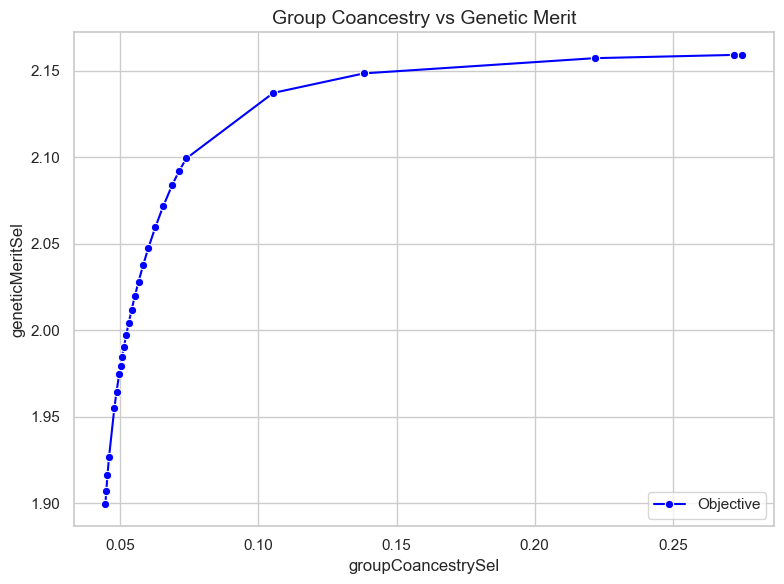

In [118]:
# Expected Genetic Merit and Group Coancestry (real scale)

#Set a Seaborn style for better aesthetics

sns.set_theme(style="whitegrid")

# Create a figure for plotting
plt.figure(figsize=(8, 6))

# Use Seaborn lineplot for better visuals
sns.lineplot(data=df_original, x='groupCoancestrySel', y='geneticMeritSel', marker='o', color='blue', label='Objective')

# Add labels and title with improved styling
plt.xlabel('groupCoancestrySel', fontsize=12)
plt.ylabel('geneticMeritSel', fontsize=12)
plt.title('Group Coancestry vs Genetic Merit', fontsize=14)

# Show legend
plt.legend(loc='lower right')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

## How group coancestry affect the value of lambda

To evaluate this we change the numerator relationship and then evaluate the value of lambda.

In [119]:
from scipy.sparse import csr_matrix

 # Introduce some inbreeding to see what happen ???
def introduce_inbreeding_sparse(A_sparse, inbreeding_level=0.1):
    """
    Introduces inbreeding by increasing self-relatedness (diagonal values)
    while keeping the matrix sparse.
    """
    A_inbred = A_sparse.copy()  # Copy sparse matrix
    current_diag = A_inbred.diagonal()  # Extract current diagonal values
    A_inbred.setdiag(current_diag + inbreeding_level)  # Modify diagonal in place
    return A_inbred

# Apply inbreeding modification
sigma001 = introduce_inbreeding_sparse(sigma, inbreeding_level=0.01)
sigma002 = introduce_inbreeding_sparse(sigma, inbreeding_level=0.02)
sigma008 = introduce_inbreeding_sparse(sigma, inbreeding_level=0.08)
sigma01 = introduce_inbreeding_sparse(sigma, inbreeding_level=0.1)
sigma02 = introduce_inbreeding_sparse(sigma, inbreeding_level=0.2)

In [120]:
empirical_evaluation = [float(x) for x in (0, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 6, 7, 8, 9, 10, 
                                           11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22.5, 25, 35, 
                                           40, 45, 50)]

results = []

kin = sigma001/2

n = kin.shape[0]
#print(n)
w = np.ones(n) / n
#print(sum(w))
#print(w)
genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
print(group_coancestry_current)

# Run the function for each lambda value
for lam in empirical_evaluation:
    # Get the result from the previous function call
    w, obj = rocs.highs_standard_genetics(kin, mubar, sires, dams, lam, dimension=n)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results
    results.append((lam, obj, genetic_merit_sel, group_coancestry_sel, deltaC, Ne))

# Convert results to a pandas DataFrame for a table-like structure
df001 = pd.DataFrame(results, columns=['lambda', 'objective', 'geneticMeritSel', 'groupCoancestrySel', 'deltaC', 'Ne'])

# Optionally, print the table
#filtered_df = df[(df["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]
print(df001)

0.04381607208251952
    lambda  objective  geneticMeritSel  groupCoancestrySel    deltaC  \
0    0.000   2.159149         2.159149            0.277599  0.244495   
1    0.005   2.158455         2.159149            0.277599  0.244495   
2    0.010   2.157761         2.159149            0.277599  0.244495   
3    0.050   2.152211         2.159046            0.273398  0.240102   
4    0.100   2.146012         2.157131            0.222371  0.186737   
5    0.500   2.113602         2.148213            0.138446  0.098966   
6    1.000   2.084079         2.136931            0.105705  0.064725   
7    5.000   1.913547         2.098986            0.074176  0.031751   
8    6.000   1.877134         2.091725            0.071531  0.028984   
9    7.000   1.841964         2.083177            0.068918  0.026252   
10   8.000   1.808317         2.070919            0.065650  0.022835   
11   9.000   1.776222         2.058607            0.062752  0.019804   
12  10.000   1.745496         2.046795      

In [121]:
empirical_evaluation = [float(x) for x in (0, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 6, 7, 8, 9, 10, 
                                           11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22.5, 25, 35, 
                                           40, 45, 50)]

results = []

kin = sigma002/2

n = kin.shape[0]
#print(n)
w = np.ones(n) / n
#print(sum(w))
#print(w)
genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
print(group_coancestry_current)

# Run the function for each lambda value
for lam in empirical_evaluation:
    # Get the result from the previous function call
    w, obj = rocs.highs_standard_genetics(kin, mubar, sires, dams, lam, dimension=n)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results
    results.append((lam, obj, genetic_merit_sel, group_coancestry_sel, deltaC, Ne))

# Convert results to a pandas DataFrame for a table-like structure
df002 = pd.DataFrame(results, columns=['lambda', 'objective', 'geneticMeritSel', 'groupCoancestrySel', 'deltaC', 'Ne'])

# Optionally, print the table
#filtered_df = df[(df["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]
print(df002)

0.04391607208251952
    lambda  objective  geneticMeritSel  groupCoancestrySel    deltaC  \
0    0.000   2.159149         2.159149            0.280099  0.247031   
1    0.005   2.158449         2.159149            0.280099  0.247031   
2    0.010   2.157748         2.159149            0.280099  0.247031   
3    0.050   2.152150         2.159019            0.274780  0.241469   
4    0.100   2.145919         2.157069            0.223003  0.187313   
5    0.500   2.113348         2.148025            0.138710  0.099148   
6    1.000   2.083728         2.136746            0.106035  0.064973   
7    5.000   1.912586         2.098652            0.074426  0.031912   
8    6.000   1.876055         2.091330            0.071758  0.029121   
9    7.000   1.840791         2.082488            0.069056  0.026295   
10   8.000   1.807095         2.070020            0.065731  0.022817   
11   9.000   1.774962         2.057604            0.062809  0.019761   
12  10.000   1.744204         2.045803      

In [122]:
empirical_evaluation = [float(x) for x in (0, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 6, 7, 8, 9, 10, 
                                           11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22.5, 25, 35, 
                                           40, 45, 50)]


results = []

kin = sigma008/2

n = kin.shape[0]
#print(n)
w = np.ones(n) / n
#print(sum(w))
#print(w)
genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
print(group_coancestry_current)

# Run the function for each lambda value
for lam in empirical_evaluation:
    # Get the result from the previous function call
    w, obj = rocs.highs_standard_genetics(kin, mubar, sires, dams, lam, dimension=n)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results
    results.append((lam, obj, genetic_merit_sel, group_coancestry_sel, deltaC, Ne))

# Convert results to a pandas DataFrame for a table-like structure
df008 = pd.DataFrame(results, columns=['lambda', 'objective', 'geneticMeritSel', 'groupCoancestrySel', 'deltaC', 'Ne'])

# Optionally, print the table
#filtered_df = df[(df["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]
print(df008)

0.04451607208251952
    lambda  objective  geneticMeritSel  groupCoancestrySel    deltaC  \
0    0.000   2.159149         2.159149            0.295099  0.262257   
1    0.005   2.158411         2.159149            0.295099  0.262257   
2    0.010   2.157673         2.159149            0.295099  0.262257   
3    0.050   2.151789         2.158871            0.283285  0.249893   
4    0.100   2.145371         2.156723            0.227045  0.191033   
5    0.500   2.111861         2.146975            0.140459  0.100413   
6    1.000   2.081667         2.135719            0.108105  0.066552   
7    5.000   1.906889         2.096787            0.075959  0.032908   
8    6.000   1.869665         2.089029            0.073121  0.029938   
9    7.000   1.833903         2.078039            0.069753  0.026413   
10   8.000   1.799937         2.064956            0.066255  0.022752   
11   9.000   1.767597         2.051850            0.063167  0.019520   
12  10.000   1.736658         2.040246      

In [123]:
empirical_evaluation = [float(x) for x in (0, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 6, 7, 8, 9, 10, 
                                           11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22.5, 25, 35, 
                                           40, 45, 50)]


results = []

kin = sigma01/2

n = kin.shape[0]
#print(n)
w = np.ones(n) / n
#print(sum(w))
#print(w)
genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
print(group_coancestry_current)

# Run the function for each lambda value
for lam in empirical_evaluation:
    # Get the result from the previous function call
    w, obj = rocs.highs_standard_genetics(kin, mubar, sires, dams, lam, dimension=n)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results
    results.append((lam, obj, genetic_merit_sel, group_coancestry_sel, deltaC, Ne))

# Convert results to a pandas DataFrame for a table-like structure
df01 = pd.DataFrame(results, columns=['lambda', 'objective', 'geneticMeritSel', 'groupCoancestrySel', 'deltaC', 'Ne'])

# Optionally, print the table
#filtered_df = df[(df["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]
print(df01)

0.04471607208251952
    lambda  objective  geneticMeritSel  groupCoancestrySel    deltaC  \
0    0.000   2.159149         2.159149            0.300099  0.267337   
1    0.005   2.158399         2.159149            0.300099  0.267337   
2    0.010   2.157648         2.159149            0.300099  0.267337   
3    0.050   2.151671         2.158826            0.286192  0.252779   
4    0.100   2.145193         2.156617            0.228480  0.192366   
5    0.500   2.111377         2.146652            0.141099  0.100895   
6    1.000   2.080994         2.135406            0.108825  0.067110   
7    5.000   1.905014         2.096082            0.076427  0.033196   
8    6.000   1.867568         2.088104            0.073512  0.030144   
9    7.000   1.831667         2.076470            0.069944  0.026409   
10   8.000   1.797615         2.063254            0.066410  0.022709   
11   9.000   1.765214         2.049930            0.063270  0.019422   
12  10.000   1.734213         2.038511      

In [ ]:
empirical_evaluation = [float(x) for x in (0, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 6, 7, 8, 9, 10, 
                                           11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22.5, 25, 35, 
                                           40, 45, 50)]

results = []

kin = sigma02/2

n = kin.shape[0]
#print(n)
w = np.ones(n) / n
#print(sum(w))
#print(w)
genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
print(group_coancestry_current)

# Run the function for each lambda value
for lam in empirical_evaluation:
    # Get the result from the previous function call
    w, obj = rocs.highs_standard_genetics(kin, mubar, sires, dams, lam, dimension=n)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results
    results.append((lam, obj, genetic_merit_sel, group_coancestry_sel, deltaC, Ne))

# Convert results to a pandas DataFrame for a table-like structure
df02 = pd.DataFrame(results, columns=['lambda', 'objective', 'geneticMeritSel', 'groupCoancestrySel', 'deltaC', 'Ne'])

# Optionally, print the table
#filtered_df = df[(df["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]
print(df02)

0.04571607208251952
    lambda  objective  geneticMeritSel  groupCoancestrySel    deltaC  \
0    0.000   2.159149         2.159149            0.325099  0.292767   
1    0.005   2.158336         2.159149            0.325099  0.292767   
2    0.010   2.157523         2.159149            0.325099  0.292767   
3    0.050   2.151094         2.158623            0.301183  0.267706   
4    0.100   2.144330         2.156141            0.236216  0.199626   
5    0.500   2.109039         2.145205            0.144664  0.103688   
6    1.000   2.077716         2.134022            0.112612  0.070100   
7    5.000   1.895856         2.092389            0.078613  0.034473   
8    6.000   1.857394         2.082844            0.075150  0.030844   
9    7.000   1.820910         2.068658            0.070785  0.026270   
10   8.000   1.786469         2.054394            0.066981  0.022284   
11   9.000   1.753795         2.041271            0.063883  0.019038   
12  10.000   1.722490         2.029576      

In [125]:

# Identify columns related to "rate of coancestry"
coancestry_columns = [col for col in compare_df.columns if "coancestry" in col.lower()]

# Convert lambda to numeric if necessary
compare_df["lambda"] = compare_df["lambda"].astype(float)  # Ensure numeric type

# Sort DataFrame by lambda
compare_df = compare_df.sort_values(by="lambda")

# Plot each "rate of coancestry" column against lambda
plt.figure(figsize=(12, 6))

for col in coancestry_columns:
    plt.plot(compare_df["lambda"], compare_df[col], marker='o', label=col)  # Plot with markers

# Labels and title
plt.xlabel("Lambda")
plt.ylabel("Group coancestry")
plt.title("Lambda vs. coancestry")

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Add legend outside the plot for clarity
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

NameError: name 'compare_df' is not defined

## Kappa
We evaluated three different values of kappa 0, 0.5 and 1. while lambda was kept constant to 1

In [6]:
# Kappa 2
values_kappa = (0, 0.5, 1)

results = []
contributions = []


# upper
upper = np.zeros(n)
upper[::2] = 0.5  
upper[1::2] = 0.02 


# lower
lower = np.zeros(n)
lower[::2] = 0.0  
lower[1::2] = 0.02  


kin = sigma/2

lam = 1

n = kin.shape[0]
#print(n)
w = np.ones(n) / n
#print(sum(w))
#print(w)
genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
print(group_coancestry_current)

# Run the function for each lambda value
for k in values_kappa:
    # Get the result from the previous function call
    w, z, obj = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=k, dimension=n, upper_bound=upper, lower_bound=lower)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    group_uncertainty = math.sqrt(w.transpose()@omega@w)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results and contributions
    results.append((k, lam, obj, z, genetic_merit_sel, group_coancestry_sel, group_uncertainty, deltaC, Ne))
    contributions.append((w))


# Convert results to a pandas DataFrame for a table-like structure
df_kappa = pd.DataFrame(results, columns=['kappa','lambda', 'objective', 'Z', 'geneticMeritSel', 'groupCoancestrySel', 'group_uncertainty', 'deltaC', 'Ne'])
df_contributions = pd.DataFrame(np.array(contributions).T, columns=['kappa0', 'kappa0.5', 'kappa1'])

# Optionally, print the table
#filtered_df = df[(df["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]


0.043716072082519535
Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms


In [8]:
print(df_kappa)

   kappa  lambda  objective         Z  geneticMeritSel  groupCoancestrySel  \
0    0.0       1   1.953775  0.142442         2.027965            0.074190   
1    0.5       1   1.884767  0.133960         2.020623            0.068876   
2    1.0       1   1.820014  0.125258         2.008856            0.063584   

   group_uncertainty    deltaC         Ne  
0           0.142442  0.031868  15.689952  
1           0.133960  0.026310  19.004051  
2           0.125258  0.020776  24.065973  


In [9]:
print(df_contributions)

          kappa0      kappa0.5        kappa1
0   4.072974e-19  1.431798e-18  1.560899e-20
1   2.000000e-02  2.000000e-02  2.000000e-02
2   1.470204e-01  1.272875e-01  1.086120e-01
3   2.000000e-02  2.000000e-02  2.000000e-02
4   0.000000e+00  0.000000e+00  0.000000e+00
5   2.000000e-02  2.000000e-02  2.000000e-02
6   0.000000e+00  0.000000e+00 -2.488604e-19
7   2.000000e-02  2.000000e-02  2.000000e-02
8   0.000000e+00  0.000000e+00 -2.096475e-19
9   2.000000e-02  2.000000e-02  2.000000e-02
10  0.000000e+00  0.000000e+00  0.000000e+00
11  2.000000e-02  2.000000e-02  2.000000e-02
12  0.000000e+00  0.000000e+00  0.000000e+00
13  2.000000e-02  2.000000e-02  2.000000e-02
14  1.172728e-01  1.168203e-01  1.060790e-01
15  2.000000e-02  2.000000e-02  2.000000e-02
16  0.000000e+00  0.000000e+00  0.000000e+00
17  2.000000e-02  2.000000e-02  2.000000e-02
18  0.000000e+00  0.000000e+00  0.000000e+00
19  2.000000e-02  2.000000e-02  2.000000e-02
20  0.000000e+00  0.000000e+00  0.000000e+00
21  2.0000

In [34]:
# Plot group uncertainty vs contributions
g_uncertainty = df_kappa['group_uncertainty']
g_uncertainty = np.array([g_uncertainty])  # Convert float to array
print(g_uncertainty)
print(type(g_uncertainty))

sires_kappa = df_contributions.iloc[sires, ]

sires_kappa['kappa0_stand'] = (sires_kappa['kappa0'] - sires_kappa['kappa0'].mean()) / sires_kappa['kappa0'].std()
sires_kappa['kappa0.5_stand'] = (sires_kappa['kappa0.5'] - sires_kappa['kappa0.5'].mean()) / sires_kappa['kappa0.5'].std()
sires_kappa['kappa1_stand'] = (sires_kappa['kappa1'] - sires_kappa['kappa1'].mean()) / sires_kappa['kappa1'].std()


print(sires_kappa)

[[0.14244172 0.13395992 0.12525776]]
<class 'numpy.ndarray'>
          kappa0      kappa0.5        kappa1  kappa0_stand  kappa0.5_stand  \
0   4.072974e-19  1.431798e-18  1.560899e-20     -0.405713       -0.450298   
2   1.470204e-01  1.272875e-01  1.086120e-01      2.576693        2.415569   
4   0.000000e+00  0.000000e+00  0.000000e+00     -0.405713       -0.450298   
6   0.000000e+00  0.000000e+00 -2.488604e-19     -0.405713       -0.450298   
8   0.000000e+00  0.000000e+00 -2.096475e-19     -0.405713       -0.450298   
10  0.000000e+00  0.000000e+00  0.000000e+00     -0.405713       -0.450298   
12  0.000000e+00  0.000000e+00  0.000000e+00     -0.405713       -0.450298   
14  1.172728e-01  1.168203e-01  1.060790e-01      1.973242        2.179900   
16  0.000000e+00  0.000000e+00  0.000000e+00     -0.405713       -0.450298   
18  0.000000e+00  0.000000e+00  0.000000e+00     -0.405713       -0.450298   
20  0.000000e+00  0.000000e+00  0.000000e+00     -0.405713       -0.450298   
22 

/var/folders/yh/0bk27b457hb862b_2wsrctcr0000gr/T/ipykernel_19093/1631411514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sires_kappa['kappa0_stand'] = (sires_kappa['kappa0'] - sires_kappa['kappa0'].mean()) / sires_kappa['kappa0'].std()
/var/folders/yh/0bk27b457hb862b_2wsrctcr0000gr/T/ipykernel_19093/1631411514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sires_kappa['kappa0.5_stand'] = (sires_kappa['kappa0.5'] - sires_kappa['kappa0.5'].mean()) / sires_kappa['kappa0.5'].std()
/var/folders/yh/0

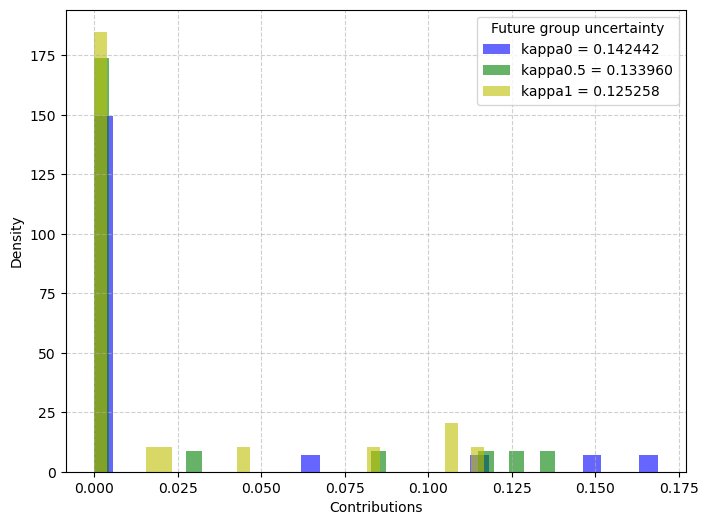

In [ ]:
plt.figure(figsize=(8, 6))

# Plot histograms with labels
plt.hist(sires_kappa['kappa0'], density=True, bins=30, alpha=0.6, color='b', label=f'kappa0 = 0.142442')
plt.hist(sires_kappa['kappa0.5'], density=True, bins=30, alpha=0.6, color='g', label=f'kappa0.5 = 0.133960')
plt.hist(sires_kappa['kappa1'], density=True, bins=30, alpha=0.6, color='y', label=f'kappa1 = 0.125258')

# Labels and title
plt.xlabel("Contributions")
plt.ylabel("Density")
# Add legend with a title
plt.legend(loc='upper right', title="Future group uncertainty")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

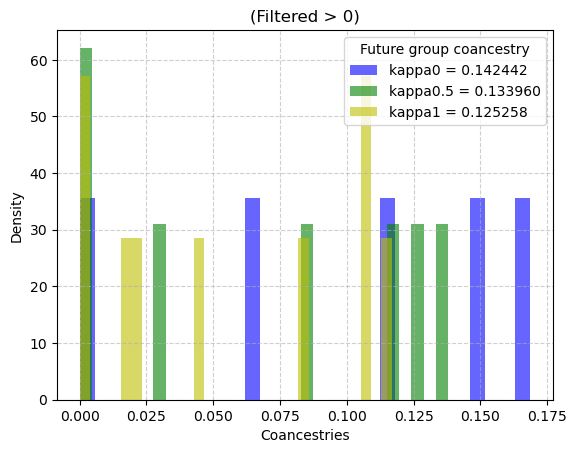

In [45]:
# Filter values greater than 0 for each dataset
kappa0_filtered = sires_kappa['kappa0'][sires_kappa['kappa0'] > 0]
kappa0_5_filtered = sires_kappa['kappa0.5'][sires_kappa['kappa0.5'] > 0]
kappa1_filtered = sires_kappa['kappa1'][sires_kappa['kappa1'] > 0]

# Plot histograms with filtered data
plt.hist(kappa0_filtered, density=True, bins=30, alpha=0.6, color='b', label=f'kappa0 = 0.142442')
plt.hist(kappa0_5_filtered, density=True, bins=30, alpha=0.6, color='g', label=f'kappa0.5 = 0.133960')
plt.hist(kappa1_filtered, density=True, bins=30, alpha=0.6, color='y', label=f'kappa1 = 0.125258')

# Labels and title
plt.xlabel("Coancestries")
plt.ylabel("Density")
plt.title("(Filtered > 0)")

# Add legend with a title
plt.legend(loc='upper right', title="Future group coancestry")

plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

In [ ]:

# Select only the Kappa columns
df_kappa['mubar'] = mubar

print(kappa_values)

# Standardize values (Z-score normalization)
#scaler = StandardScaler()
#kappa_standardized = pd.DataFrame(scaler.fit_transform(kappa_values), columns=kappa_columns)
#kappa_standardized = kappa_values / kappa_values.max()


# Create a boxplot
#plt.figure(figsize=(8, 6))
#plt.boxplot([kappa_values[col] for col in kappa_columns], labels=kappa_columns)

# Labels and title
#plt.xlabel("Kappa Level")
#plt.ylabel("Standardized Kappa Values (Z-score)")
#plt.title("Standardized Boxplot of Kappa Values")

# Show the plot
#plt.show()

          kappa0      kappa0.5        kappa1     mubar  diag_omega
0   4.072974e-19  1.431798e-18  1.560899e-20  1.780709    0.237507
1   2.000000e-02  2.000000e-02  2.000000e-02  2.057584    0.234034
2   1.470204e-01  1.272875e-01  1.086120e-01  2.228707    0.242252
3   2.000000e-02  2.000000e-02  2.000000e-02  1.732222    0.233924
4   0.000000e+00  0.000000e+00  0.000000e+00  1.494452    0.243762
5   2.000000e-02  2.000000e-02  2.000000e-02  1.800812    0.215944
6   0.000000e+00  0.000000e+00 -2.488604e-19  1.812057    0.244082
7   2.000000e-02  2.000000e-02  2.000000e-02  2.079297    0.239270
8   0.000000e+00  0.000000e+00 -2.096475e-19  1.926828    0.229216
9   2.000000e-02  2.000000e-02  2.000000e-02  1.990366    0.229910
10  0.000000e+00  0.000000e+00  0.000000e+00  1.785652    0.236691
11  2.000000e-02  2.000000e-02  2.000000e-02  1.638875    0.226661
12  0.000000e+00  0.000000e+00  0.000000e+00  1.825589    0.233413
13  2.000000e-02  2.000000e-02  2.000000e-02  1.919964    0.22

In [ ]:
#Compute correlation matrix
correlation_matrix = kappa_values.iloc[range(0, n, 2)].corr()
# Display
print(correlation_matrix.iloc[0:4, 3]) 

kappa0      0.752662
kappa0.5    0.801131
kappa1      0.847518
mubar       1.000000
Name: mubar, dtype: float64


In [134]:

# Select only the Kappa columns
kappa_columns = ["kappa0", "kappa0.5", "kappa1"]
kappa_values =  kappa_values.iloc[range(0, n, 2)]   
# Standardize by dividing by the max value of each column
#kappa_standardized = kappa_values / kappa_values.max()

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([kappa_values[col] for col in kappa_columns], labels=kappa_columns)

# Labels and title
plt.xlabel("Kappa Level")
plt.ylabel("contributions")
plt.title("Boxplot of Kappa Values vs contributions")

# Show the plot
plt.show()

IndexError: positional indexers are out-of-bounds

Description: The boxplot displays the Kappa values (0, 0.5, and 1) on the x-axis against contributions on the y-axis. As the value of lambda increases, fewer bulls are selected as future parents, which explains the decreasing variation observed across the three scenarios. 

In [133]:
# Mubar vs contributions

#import matplotlib.pyplot as plt

# Ensure kappa_values is filtered correctly
kappa_values = kappa_values.iloc[range(0, n, 2)]

# Define the Kappa levels
kappa_levels = [0.142442, 0.133960, 0.125258]

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Loop through each kappa level and plot its corresponding values
for i, kappa in enumerate(kappa_levels):
    plt.scatter(
        [kappa] * len(kappa_values),  # X-axis: Repeated kappa level
        kappa_values.iloc[:, i],  # Y-axis: Contributions from kappa_values
        label=f"Kappa {kappa}",
        alpha=0.7
    )

# Labels and title
plt.xlabel("Kappa Level")
plt.ylabel("Contributions")
plt.title("Scatterplot of Kappa Values vs Contributions")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


IndexError: positional indexers are out-of-bounds

Description: The scatterplot displays expected breeding values on the x-axis against contributions on the y-axis. It shows that as Kappa is relaxed, contributions tend to increase. Between 1.9 and 2.1 contributions are higher when Kappa is set to 1. This trend is more or less what we expected in our one and one meeting.

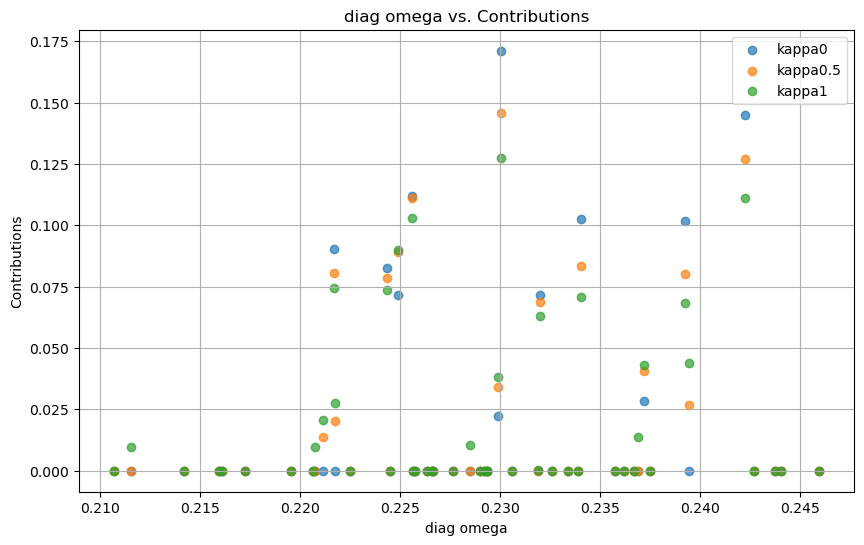

In [ ]:
# Omega vs contributions

# 
kappa_columns = ["kappa0", "kappa0.5", "kappa1"]
mubar_column = "group_uncertainty"

# 
plt.figure(figsize=(8, 6))

# 
plt.scatter(kappa_values["mubar"], kappa_values["kappa0"], label="kappa0", alpha=0.7)
plt.scatter(kappa_values["mubar"], kappa_values["kappa0.5"], label="kappa0.5", alpha=0.7)
plt.scatter(kappa_values["mubar"], kappa_values["kappa1"], label="kappa1", alpha=0.7)

# 
plt.xlabel("mubar")
plt.ylabel("contributions")
plt.title("mubar vs contributions")
plt.legend()  # Show legend
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for readability





However, I do not observe a clear trend in this final plot, where diag(omega) is plotted against contributions.

In [ ]:
# Kappa 

values_kappa = (0, 0.5, 1)

results = []

kin = sigma/2

lam = (8, 9, 10, 11, 12, 13, 14, 15)

n = kin.shape[0]
#print(n)
w = np.ones(n) / n
#print(sum(w))
#print(w)
genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
print(group_coancestry_current)

# Run the function for each lambda value
for k in values_kappa:
    # Get the result from the previous function call
    w, z, obj = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=k, dimension=n)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    group_uncertainty = math.sqrt(w.transpose()@omega@w)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results
    results.append((k, lam, obj, z, genetic_merit_sel, group_coancestry_sel, group_uncertainty, deltaC, Ne))

# Convert results to a pandas DataFrame for a table-like structure
df_kappa = pd.DataFrame(results, columns=['kappa','lambda', 'objective', 'Z', 'geneticMeritSel', 'groupCoancestrySel', 'group_uncertainty', 'deltaC', 'Ne'])

# Optionally, print the table
#filtered_df = df[(df["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]
print(df_kappa)

In [ ]:
values_kappa = (0, 1)

results = []

kin = sigma/2

lam = 0

n = kin.shape[0]
#print(n)
w = np.ones(n) / n
#print(sum(w))
#print(w)
genetic_merit_current = utils.expected_genetic_merit(w, mubar)
group_coancestry_current = utils.group_coancestry(w, kin)
#print(genetic_merit_current)
print(group_coancestry_current)

# Run the function for each lambda value
for k in values_kappa:
    # Get the result from the previous function call
    w, z, obj = rocs.highs_robust_genetics(sigma, mubar, omega, sires, dams, lam=lam, kappa=k, dimension=n)
    
    # Compute the expected genetic merit and group coancestry
    genetic_merit_sel = utils.expected_genetic_merit(w, mubar)
    group_coancestry_sel = utils.group_coancestry(w, kin)
    group_uncertainty = math.sqrt(w.transpose()@omega@w)
    deltaC = (group_coancestry_sel - group_coancestry_current) / (1.0 - group_coancestry_current)
    Ne = 1 / (2 * deltaC)
    
    # Append results
    results.append((k, lam, obj, z, genetic_merit_sel, group_coancestry_sel, deltaC, Ne))

# Convert results to a pandas DataFrame for a table-like structure
df_kappa = pd.DataFrame(results, columns=['kappa','lambda', 'objective', 'geneticMeritSel', 'groupCoancestrySel', 'group_uncertainty', 'deltaC', 'Ne'])

# Optionally, print the table
#filtered_df = df[(df["deltaC"] > 0.0049) & (df["deltaC"] < 0.015)]
print(df_kappa)

0.043716072082519535
Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Hessian has dimension 50 but no nonzeros, so is ignored
Running HiGHS 1.8.1 (git hash: 4a7f24a): Copyright (c) 2024 HiGHS under MIT licence terms
Hessian has dimension 50 but no nonzeros, so is ignored
   kappa  lambda  objective  geneticMeritSel  groupCoancestrySel  \
0      0       0   2.159149         0.334122            2.159149   
1      1       0   1.965574         0.157361            2.122934   

   group_uncertainty    deltaC         Ne  
0           0.275099  0.241960   2.066457  
1           0.087471  0.045755  10.927785  


optiSel

In [ ]:
df_optisel = pd.read_table("/Users/s2745345/Documents/jortizPhD/robust/lambda/robustOCS/empirical_optiSel.txt", sep='\t')
df_optisel

,lambda,groupCoancestryRobust,expGeneticMerit,groupCoancestryOptisel,rateCoancestryOptisel
0,0.000000e+00,0.550197,2.159142,0.279917,0.246999
1,5.000000e-03,0.550197,2.159142,0.279917,0.246999
2,1.000000e-02,0.550197,2.159142,0.279917,0.246999
3,5.000000e-02,0.443506,2.159140,0.279913,0.246995
4,1.000000e-01,0.349921,2.159148,0.279938,0.247020
5,5.000000e-01,0.210740,2.156336,0.210748,0.174667
6,1.000000e+00,0.181434,2.154190,0.181446,0.144026
7,5.000000e+00,0.120382,2.141558,0.120384,0.080173
8,1.000000e+01,0.099226,2.130357,0.099227,0.058049
9,5.000000e+01,0.087253,2.116437,0.087255,0.045529


In [ ]:
print(1/(2*50))
print(1/(2*100))

0.01
0.005


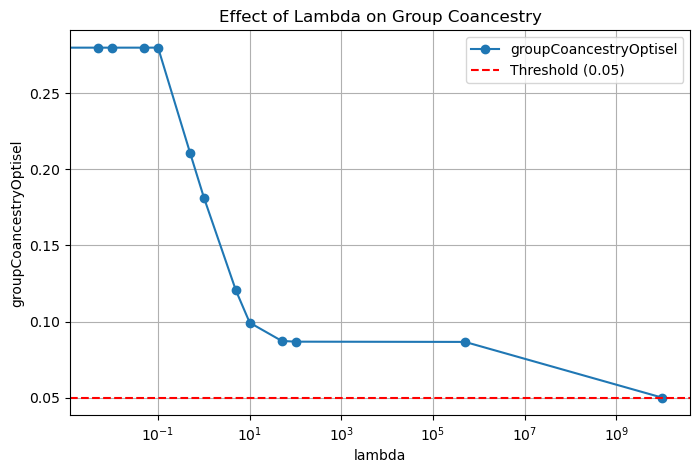

In [ ]:
# Plot Effect Lambda on Group Coancestry

plt.figure(figsize=(8, 5))
plt.plot(df_optisel['lambda'], df['groupCoancestryOptisel'], marker='o', linestyle='-', label='groupCoancestryOptisel')
plt.axhline(y=0.05, color='r', linestyle='--', label='Threshold (0.05)')
plt.xscale('log')  # Use log scale for better visualization of lambda
plt.xlabel('lambda')
plt.ylabel('groupCoancestryOptisel')
plt.title('Effect of Lambda on Group Coancestry')
plt.legend()
plt.grid(True)
plt.show()

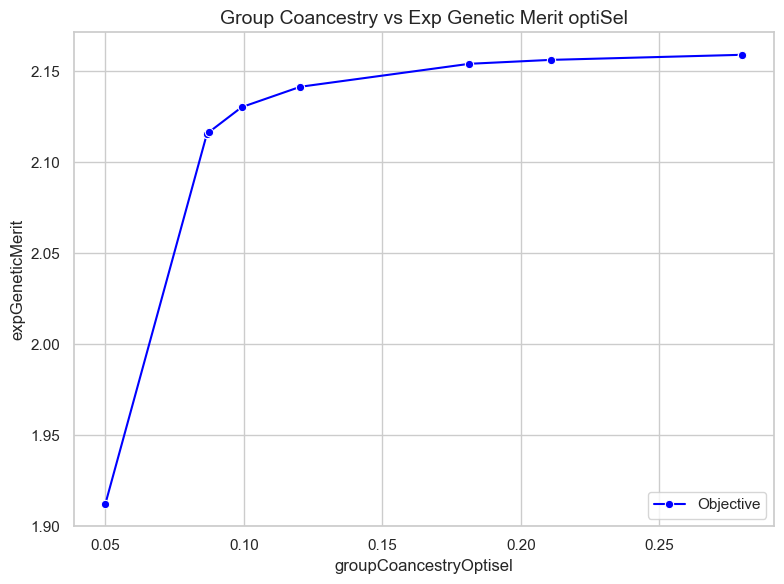

In [ ]:
# Expected Genetic Merit and Group Coancestry (real scale)

#Set a Seaborn style for better aesthetics

sns.set_theme(style="whitegrid")

# Create a figure for plotting
plt.figure(figsize=(8, 6))

# Use Seaborn lineplot for better visuals
sns.lineplot(data=df_optisel, x='groupCoancestryOptisel', y='expGeneticMerit', marker='o', color='blue', label='Objective')

# Add labels and title with improved styling
plt.xlabel('groupCoancestryOptisel', fontsize=12)
plt.ylabel('expGeneticMerit', fontsize=12)
plt.title('Group Coancestry vs Exp Genetic Merit optiSel', fontsize=14)

# Show legend
plt.legend(loc='lower right')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Values Standardization and Scaling

# Initialize StandardScaler and MinMaxScaler
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Standardize the 'Expected Genetic Merit' and 'Group Coancestry' columns
df['expGeneticMeritStd'] = standard_scaler.fit_transform(df[['expGeneticMerit']])
df['groupCoancestryStd'] = standard_scaler.fit_transform(df[['groupCoancestryOptisel']])

# Scale the 'Expected Genetic Merit' and 'Group Coancestry' columns to the range [0, 1]
df['expGeneticMeritScaled'] = min_max_scaler.fit_transform(df[['expGeneticMerit']])
df['groupCoancestryScaled'] = min_max_scaler.fit_transform(df[['groupCoancestryOptisel']])

# Show the first few rows of the updated DataFrame
print(df)

   lambda  groupCoancestryRobust  expGeneticMerit  groupCoancestryOptisel  \
0     0.0               0.550197         2.159142                0.279917   
1     0.5               0.210740         2.156336                0.210748   
2     1.0               0.181434         2.154190                0.181446   
3     1.5               0.167053         2.152612                0.167055   
4     2.0               0.156428         2.151079                0.156438   

   rateCoancestry  expGeneticMeritStd  groupCoancestryStd  \
0        0.246999            4.497089            9.107683   
1        0.174667            4.173020            5.734211   
2        0.144026            3.925111            4.305128   
3        0.128977            3.742839            3.603273   
4        0.117875            3.565680            3.085484   

   expGeneticMeritScaled  groupCoancestryScaled  
0               1.000000               1.000000  
1               0.935522               0.641896  
2               0.88

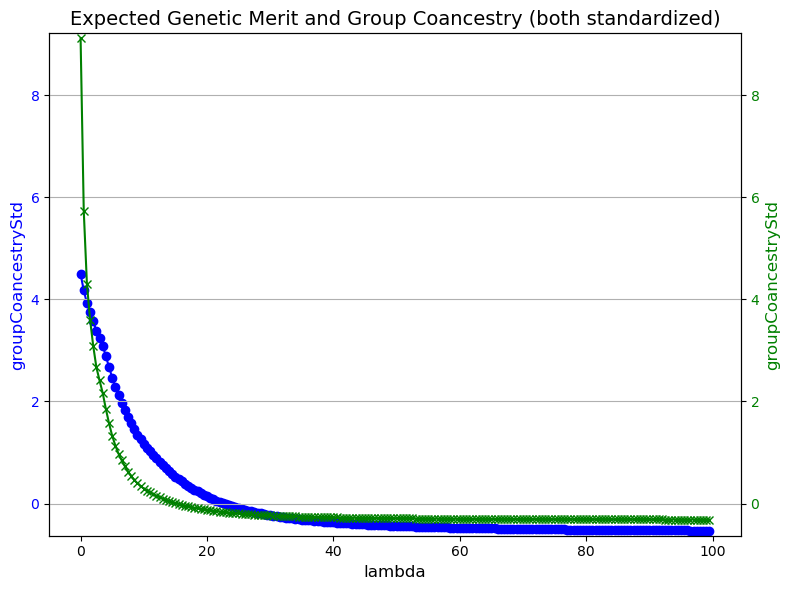

In [ ]:
# Standardized Expected Genetic Merit and Group Coancestry

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Standardized Expected Genetic Merit on the left y-axis
ax1.plot(df['lambda'], df['expGeneticMeritStd'], color='blue', label='expGeneticMeritStd', marker='o')
ax1.set_xlabel('lambda', fontsize=12)
ax1.set_ylabel('groupCoancestryStd', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis for Standardized Group Coancestry
ax2 = ax1.twinx()
ax2.plot(df['lambda'], df['groupCoancestryStd'], color='green', label='groupCoancestryStd', marker='x')
ax2.set_ylabel('groupCoancestryStd', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Ensure both y-axes are scaled similarly and have 0 at the same position
# Get min and max values for both metrics to determine the axis range
y_min = min(df['expGeneticMeritStd'].min(), df['groupCoancestryStd'].min())
y_max = max(df['expGeneticMeritStd'].max(), df['groupCoancestryStd'].max())

# Set the limits for both y-axes (you can adjust the margins if necessary)
margin = 0.1  # Extra margin to ensure both axes are clear and not touching the edges
ax1.set_ylim([y_min - margin, y_max + margin])
ax2.set_ylim([y_min - margin, y_max + margin])

# Add a title
plt.title('Expected Genetic Merit and Group Coancestry (both standardized)', fontsize=14)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

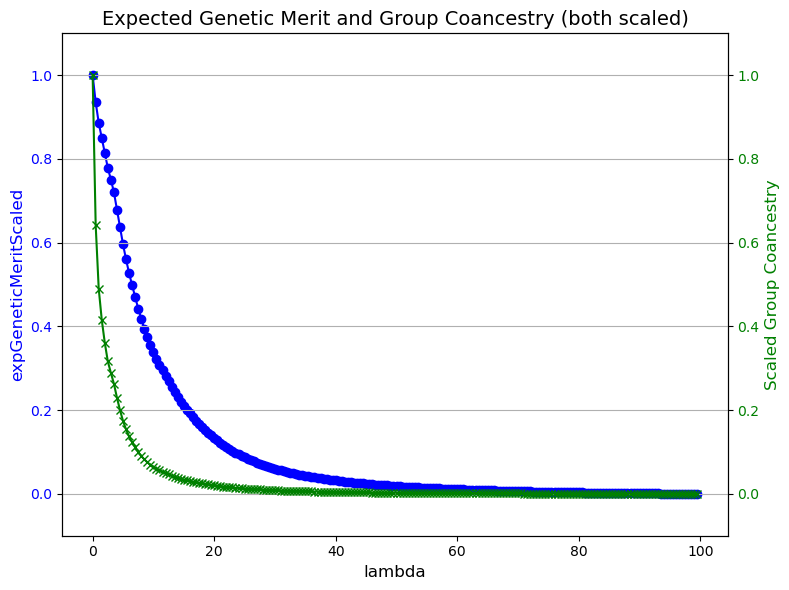

In [ ]:
# Scaled Expected Genetic Merit and Group Coancestry

# Create a figure and axis for plotting
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Scaled Expected Genetic Merit on the left y-axis
ax1.plot(df['lambda'], df['expGeneticMeritScaled'], color='blue', label='expGeneticMeritScaled', marker='o')
ax1.set_xlabel('lambda', fontsize=12)
ax1.set_ylabel('expGeneticMeritScaled', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second y-axis for Scaled Group Coancestry
ax2 = ax1.twinx()
ax2.plot(df['lambda'], df['groupCoancestryScaled'], color='green', label='groupCoancestryScaled', marker='x')
ax2.set_ylabel('Scaled Group Coancestry', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Ensure both y-axes are scaled similarly and have 0 at the same position
# Get min and max values for both metrics to determine the axis range
y_min = min(df['expGeneticMeritScaled'].min(), df['groupCoancestryScaled'].min())
y_max = max(df['expGeneticMeritScaled'].max(), df['groupCoancestryScaled'].max())

# Set the limits for both y-axes (you can adjust the margins if necessary)
margin = 0.1  # Extra margin to ensure both axes are clear and not touching the edges
ax1.set_ylim([y_min - margin, y_max + margin])
ax2.set_ylim([y_min - margin, y_max + margin])

# Add a title
plt.title('Expected Genetic Merit and Group Coancestry (both scaled)', fontsize=14)

# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

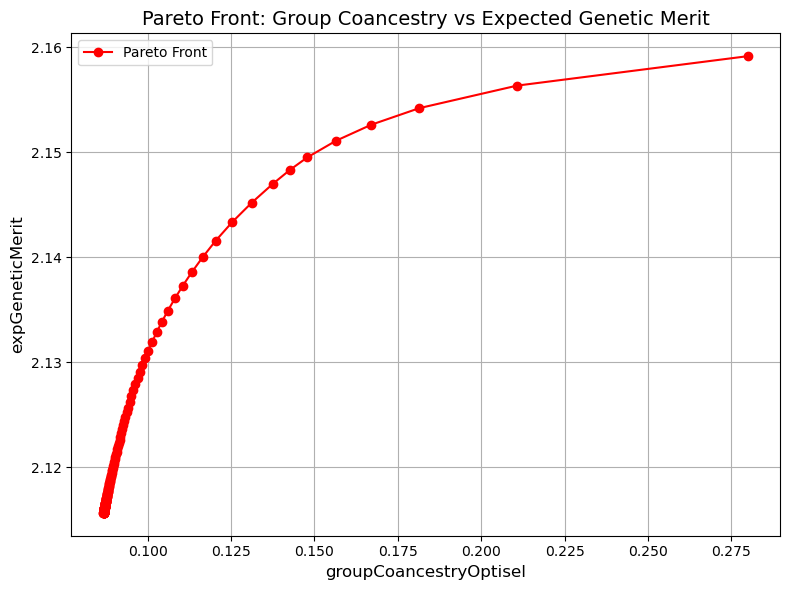

In [ ]:
# Pareto frontier

# Sort the DataFrame by Expected Genetic Merit (in descending order)
df_sorted = df.sort_values(by=['expGeneticMerit'], ascending=False)

# Initialize a list to store the Pareto front points
pareto_front = []

# Track the lowest Group Coancestry seen so far
min_coancestry = float('inf')

# Loop through the sorted DataFrame to identify the Pareto front
for i, row in df_sorted.iterrows():
    if row['groupCoancestryOptisel'] < min_coancestry:
        pareto_front.append(row)
        min_coancestry = row['groupCoancestryOptisel']

# Convert the Pareto front list to a DataFrame
pareto_df = pd.DataFrame(pareto_front)

# Plot the Pareto front
plt.figure(figsize=(8, 6))

# Plot all points (Group Coancestry vs Expected Genetic Merit)
#plt.scatter(df['groupCoancestry'], df['expGeneticMerit'], c=df['lambda'], cmap='viridis', label='Optimization Outcome', edgecolors='k', alpha=0.5)

# Plot the Pareto front points
plt.plot(pareto_df['groupCoancestryOptisel'], pareto_df['expGeneticMerit'], color='red', marker='o', linestyle='-', markersize=6, label='Pareto Front')

# Add labels and title
plt.xlabel('groupCoancestryOptisel', fontsize=12)
plt.ylabel('expGeneticMerit', fontsize=12)
plt.title('Pareto Front: Group Coancestry vs Expected Genetic Merit', fontsize=14)

# Add a color bar for lambda values
#cbar = plt.colorbar()
#cbar.set_label('lambda', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

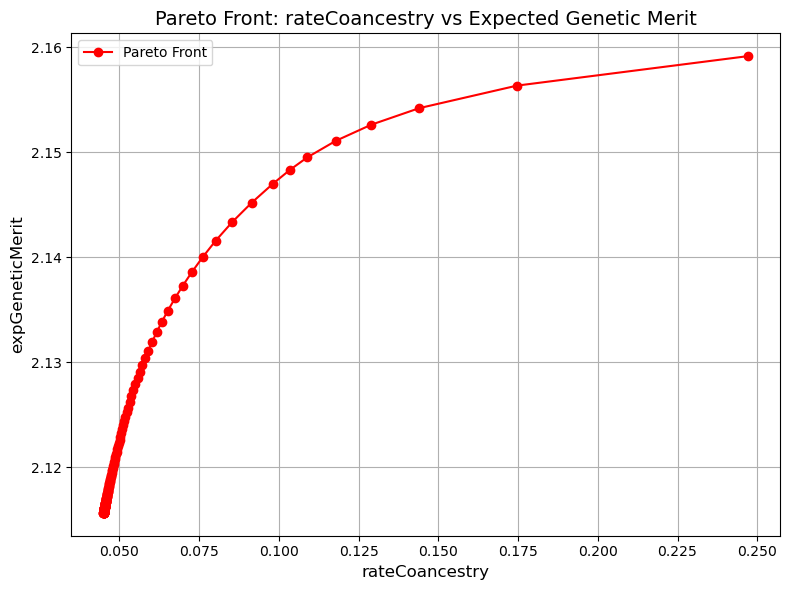

In [ ]:
# Pareto frontier

# Sort the DataFrame by Expected Genetic Merit (in descending order)
df_sorted = df.sort_values(by=['expGeneticMerit'], ascending=False)

# Initialize a list to store the Pareto front points
pareto_front = []

# Track the lowest Group Coancestry seen so far
min_coancestry = float('inf')

# Loop through the sorted DataFrame to identify the Pareto front
for i, row in df_sorted.iterrows():
    if row['rateCoancestry'] < min_coancestry:
        pareto_front.append(row)
        min_coancestry = row['rateCoancestry']

# Convert the Pareto front list to a DataFrame
pareto_df = pd.DataFrame(pareto_front)

# Plot the Pareto front
plt.figure(figsize=(8, 6))

# Plot all points (Group Coancestry vs Expected Genetic Merit)
#plt.scatter(df['groupCoancestry'], df['expGeneticMerit'], c=df['lambda'], cmap='viridis', label='Optimization Outcome', edgecolors='k', alpha=0.5)

# Plot the Pareto front points
plt.plot(pareto_df['rateCoancestry'], pareto_df['expGeneticMerit'], color='red', marker='o', linestyle='-', markersize=6, label='Pareto Front')

# Add labels and title
plt.xlabel('rateCoancestry', fontsize=12)
plt.ylabel('expGeneticMerit', fontsize=12)
plt.title('Pareto Front: rateCoancestry vs Expected Genetic Merit', fontsize=14)

# Add a color bar for lambda values
#cbar = plt.colorbar()
#cbar.set_label('lambda', fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Step-by-Step Process to Create a Risk-Return Indifference Curve
The indifference curve is parametrized by different levels of risk tolerance. As you change your risk tolerance, you will get different combinations of genetic gain and inbreeding risk that you are willing to accept.
What is on the X and Y Axes?
The X-axis will represent inbreeding risk 
R
(
λ
)
R(λ).
The Y-axis will represent genetic gain 
G
(
λ
)
G(λ).
What Do You Vary?
You vary 
λ
λ to generate different combinations of genetic gain and inbreeding risk.
You will calculate the genetic gain 
G
(
λ
)
G(λ) and inbreeding risk 
R
(
λ
)
R(λ) for different values of 
λ
λ.
What is the Indifference Curve?
The indifference curve is a plot where for any given level of inbreeding risk, you will have a specific level of genetic gain that you're willing to accept (based on your risk tolerance).
As you change the value of inbreeding risk, you will adjust 
λ
λ so that the genetic gain and inbreeding risk balance out according to your desired risk tolerance.

How to Generate a Risk-Return Indifference Curve
Choose different levels of risk tolerance (i.e., acceptable inbreeding risk) that correspond to your breeding goals.
For example, if you're willing to tolerate high inbreeding risk, your curve will include points where inbreeding risk is high, but you're aiming for high genetic gain as well. Conversely, if you're focusing on genetic diversity, you might choose lower inbreeding risks and trade-off some genetic gain.
Generate a set of 
λ
λ values: For each risk tolerance, solve the optimization problem to get the corresponding genetic gain and inbreeding risk.
Plot the Indifference Curves: You’ll plot these combinations of genetic gain and inbreeding risk for each level of risk tolerance. Each set of points forms a curve.
Example: Python Code to Create the Indifference Curves
Let's consider a simple example where you generate the indifference curve based on varying your risk tolerance and the corresponding values of 
λ
λ

Interpreting the Indifference Curve
Each point on the curve represents a specific trade-off between genetic gain and inbreeding risk for a particular risk tolerance (which is controlled by 
λ
λ).
Shifting the curve: As you adjust 
λ
λ, you change the relative weight between genetic gain and inbreeding risk. A larger 
λ
λ corresponds to prioritizing inbreeding risk (lower gain, lower risk), while a smaller 
λ
λ prioritizes genetic gain (higher gain, higher risk).
Conclusion
The Risk-Return Indifference Curve helps you visualize how much genetic gain you're getting for a given level of inbreeding risk, which can be extremely useful for balancing short-term genetic improvement and long-term genetic health.
By adjusting 
λ
λ, you can evaluate different strategies to manage your risk tolerance and breeding goals.
